In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot

%matplotlib inline

In [3]:
data = pd.read_csv("/Users/pranj/Downloads/data.csv")

In [4]:
data.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [5]:
data.shape

(768, 9)

In [6]:
data.isnull().values.any()

False

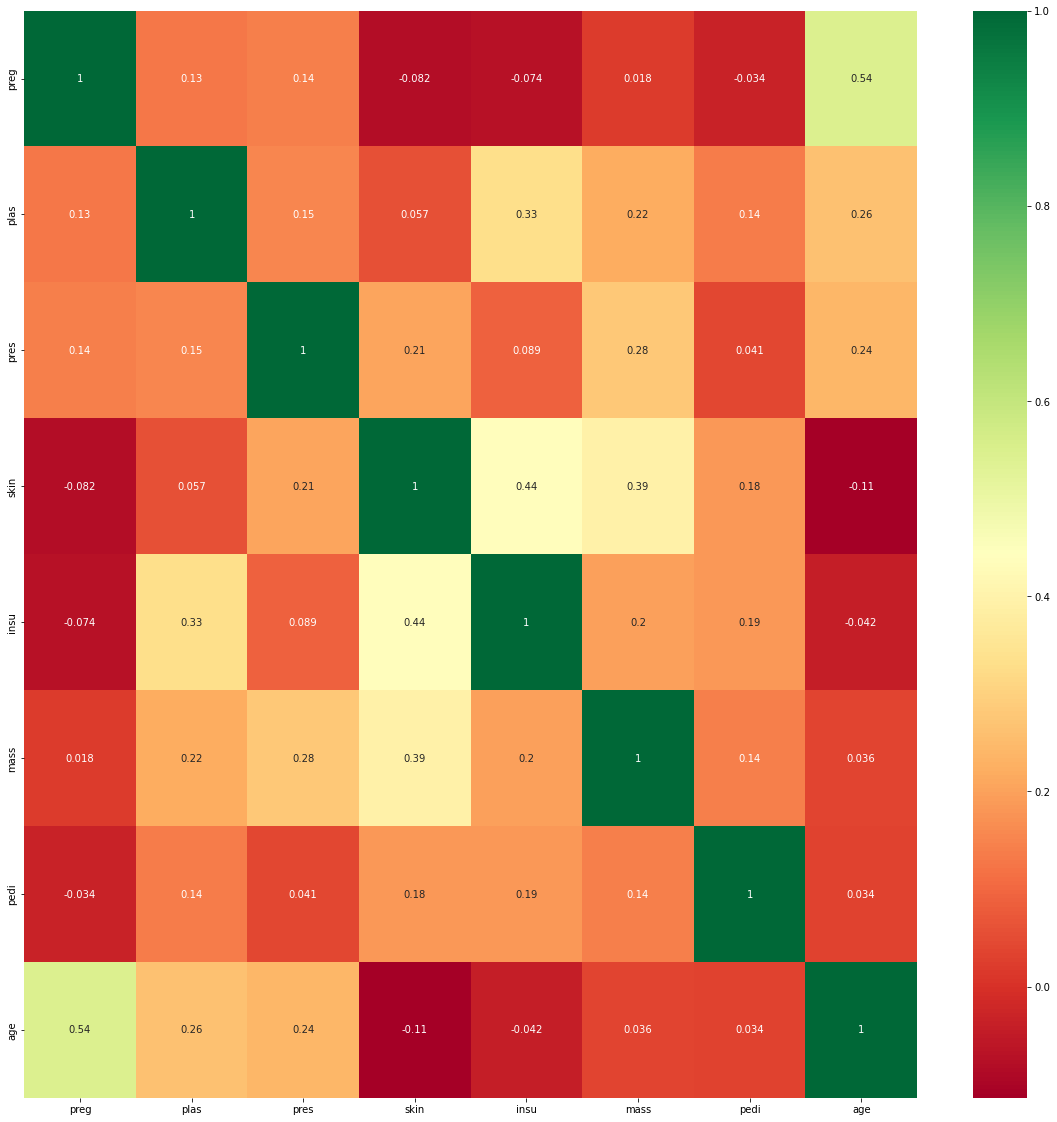

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [8]:
data.corr()

,preg,plas,pres,skin,insu,mass,pedi,age
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
insu,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


In [9]:
diabetes_map = {"tested_positive": 1, "tested_negative": 0}

In [10]:
data['class'] = data['class'].map(diabetes_map)

In [11]:
data.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


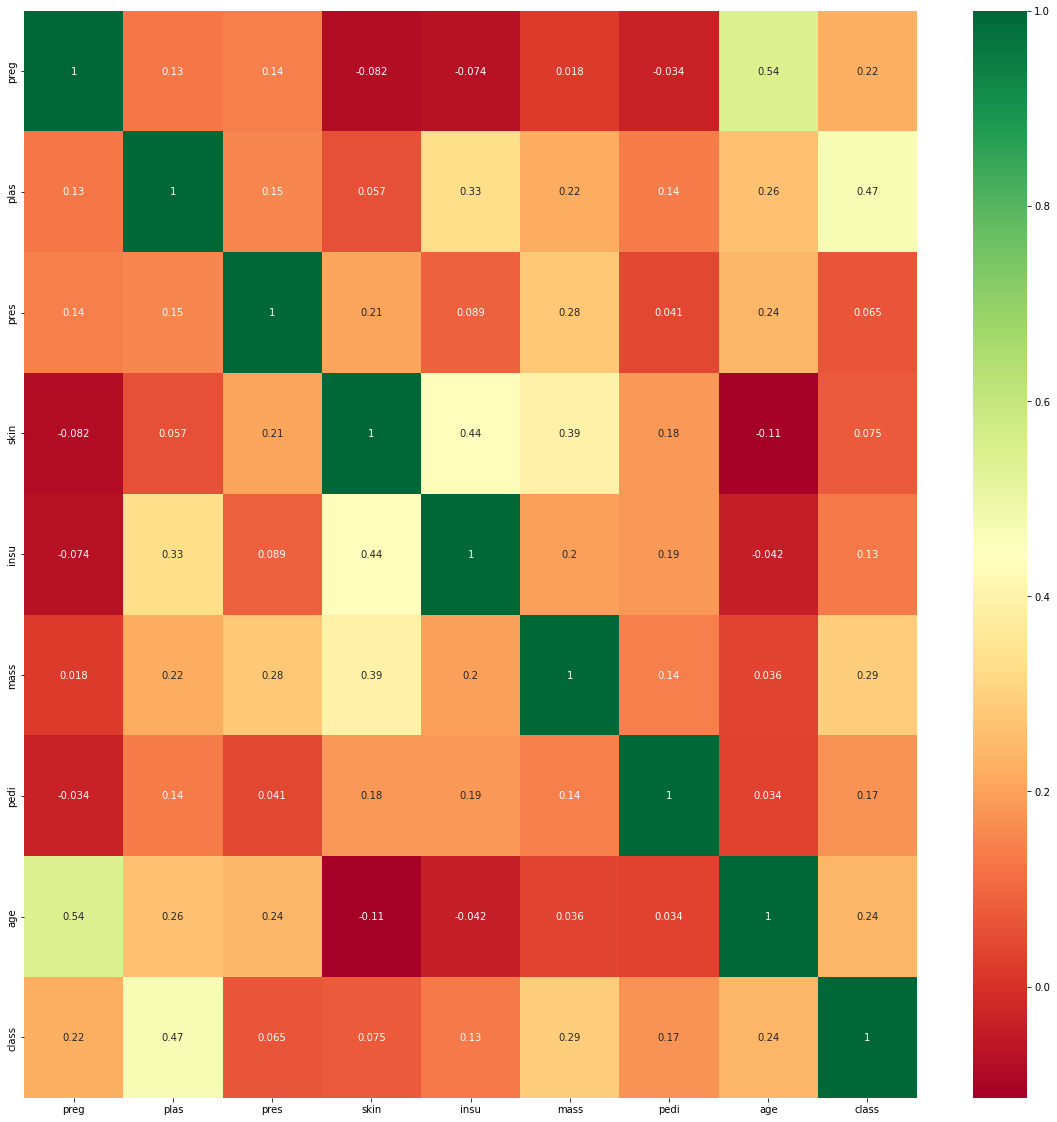

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [13]:
data.corr()

,preg,plas,pres,skin,insu,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insu,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [14]:
diabetes_true_count = len(data.loc[data['class'] == True])
diabetes_false_count = len(data.loc[data['class'] == False])

In [15]:
(diabetes_true_count,diabetes_false_count)

(268, 500)

In [16]:
## Train Test Split

from sklearn.model_selection import train_test_split
feature_columns = ['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age']
predicted_class = ['class']

In [17]:
X = data[feature_columns].values
y = data[predicted_class].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

In [18]:
print("total number of rows : {0}".format(len(data)))
print("number of rows missing plas: {0}".format(len(data.loc[data['plas'] == 0])))
print("number of rows missing pres: {0}".format(len(data.loc[data['pres'] == 0])))
print("number of rows missing skin: {0}".format(len(data.loc[data['skin'] == 0])))
print("number of rows missing insu: {0}".format(len(data.loc[data['insu'] == 0])))
print("number of rows missing mass: {0}".format(len(data.loc[data['mass'] == 0])))
print("number of rows missing pedi: {0}".format(len(data.loc[data['pedi'] == 0])))
print("number of rows missing age: {0}".format(len(data.loc[data['age'] == 0])))

total number of rows : 768
number of rows missing plas: 5
number of rows missing pres: 35
number of rows missing skin: 227
number of rows missing insu: 374
number of rows missing mass: 11
number of rows missing pedi: 0
number of rows missing age: 0


In [19]:
from sklearn.impute import SimpleImputer

fill_values = SimpleImputer(missing_values=0, strategy="mean")

X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix

clf = DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X_train,y_train.ravel())
prediction = clf.predict(X_test)
print("Accuracy for Decision tree:", metrics.accuracy_score(y_test, prediction),"\n")
tn, fp, fn, tp = confusion_matrix(prediction, y_test).ravel()
tpr = round((tp/(tp+fn))*100,2)
tnr = round((tn/(tn+fp))*100,2)

print(f"The confusion matrix is : {confusion_matrix(prediction, y_test).ravel()}\n")
print(f"true positive rate is : {tpr} %\n")
print(f"true negative rate is : {tnr} %\n")


Accuracy for Decision tree: 0.7186147186147186 

The confusion matrix is : [112  33  32  54]

true positive rate is : 62.79 %

true negative rate is : 77.24 %



In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train.ravel())
prediction3 =  lda.predict(X_test)
print("Accuracy for LDA: ", metrics.accuracy_score(y_test, prediction3),"\n")
tn, fp, fn, tp = confusion_matrix(prediction3, y_test).ravel()
tpr = round((tp/(tp+fn))*100,2)
tnr = round((tn/(tn+fp))*100,2)

print(f"The confusion matrix is : {confusion_matrix(prediction3, y_test).ravel()}\n")
print(f"true positive rate is : {tpr} %\n")
print(f"true negative rate is : {tnr} %\n")

Accuracy for LDA:  0.7445887445887446 

The confusion matrix is : [128  43  16  44]

true positive rate is : 73.33 %

true negative rate is : 74.85 %



In [29]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(random_state=10)
random_forest_model.fit(X_train, y_train.ravel())
prediction2 = random_forest_model.predict(X_test)
print("Accuracy for Random forest", metrics.accuracy_score(y_test, prediction2), "\n")
tn, fp, fn, tp = confusion_matrix(prediction2, y_test).ravel()
tpr = round((tp/(tp+fn))*100,2)
tnr = round((tn/(tn+fp))*100,2)

print(f"The confusion matrix is : {confusion_matrix(prediction2, y_test).ravel()}\n")
print(f"true positive rate is : {tpr} %\n")
print(f"true negative rate is : {tnr} %\n")

Accuracy for Random forest 0.7662337662337663 

The confusion matrix is : [130  40  14  47]

true positive rate is : 77.05 %

true negative rate is : 76.47 %



In [30]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train.ravel())
prediction4 = clf.predict(X_test)
print("Accuracy for Gradient boosting", metrics.accuracy_score(y_test, prediction4),"\n" )
tn, fp, fn, tp = confusion_matrix(prediction4, y_test).ravel()
tpr = round((tp/(tp+fn))*100,2)
tnr = round((tn/(tn+fp))*100,2)

print(f"The confusion matrix is : {confusion_matrix(prediction4, y_test).ravel()}\n")
print(f"true positive rate is : {tpr} %\n")
print(f"true negative rate is : {tnr} %\n")

Accuracy for Gradient boosting 0.7316017316017316 

The confusion matrix is : [117  35  27  52]

true positive rate is : 65.82 %

true negative rate is : 76.97 %



In [31]:
importance = random_forest_model.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.08547
Feature: 1, Score: 0.26514
Feature: 2, Score: 0.07860
Feature: 3, Score: 0.07592
Feature: 4, Score: 0.08340
Feature: 5, Score: 0.15403
Feature: 6, Score: 0.12603
Feature: 7, Score: 0.13140


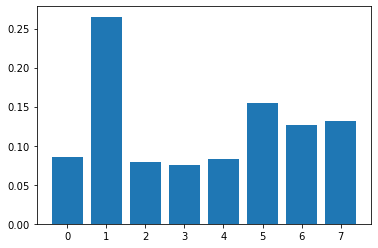

In [32]:
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

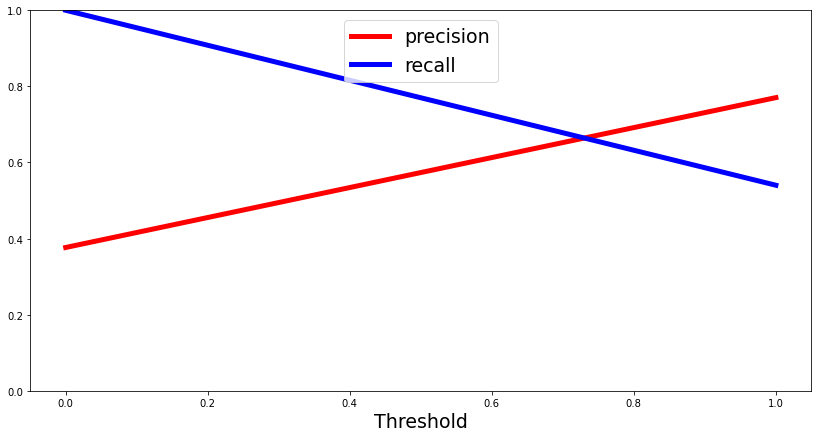

In [26]:
from sklearn.metrics import precision_recall_curve
prec, rec, thres = precision_recall_curve(y_test, prediction2)

def plot_precision_recall(prec, recall, thres):
    plt.plot(thres, prec[:-1],"r-",label="precision",linewidth=5)
    plt.plot(thres, rec[:-1],"b",label="recall",linewidth=5)
    plt.xlabel("Threshold", fontsize=19)
    plt.legend(loc=9,fontsize=19)
    plt.ylim([0,1])
plt.figure(figsize=(14,7))
plot_precision_recall(prec, rec, thres)

plt.show()

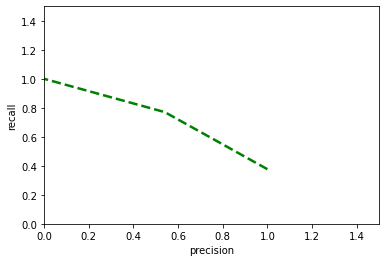

In [49]:
def plot_precision_vs_recall(prec, rec):
    plt.plot(rec, prec, "g--", linewidth=2.5)
    plt.ylabel("recall")
    plt.xlabel("precision")
    plt.axis([0,1.5,0,1.5])
plt.figure()
plot_precision_vs_recall(prec,rec)
plt.savefig('Prec_vs_recall.png')
plt.show()